# Genre recognition: experiment

Goal: Assess the behavior of the structuring auto-encoder at different levels of noise.

Conclusion: Accuracy decreases linearly with the noise level. Higher the noise, greater the difference with the baseline (and hopefully the graph-less model).

Observations:
* With `Ncv`=20 (thanks to decreased variance), 10 minutes per classification (instead of 20).
* With `lg`=100, 10 minutes for feature extraction.
* Should run for 2h. Ran for 2h50.
* Warning: the baseline is with a noise level of 50% (the last one).
* 50% noise: 15% increase in accuracy with the graph (compared to baseline).
* 10% noise: 5.3% increase. No baseline available for other noise values.
* All the objectives increase with the noise level.
* Sparsity decreases as a noisy signal is more complex to represent.

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'noise_std'
Pvalues = [0, 0.01, 0.05, 0.1, 0.2, 0.5]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0.1

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['Nfolds'] = 10
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32
Elapsed time: 585.89 seconds
All self-referenced in the first column: True
dist in [0.0, 0.681089401245]
w in [0.283994346857, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2789250,), float32
  L_indices : (2789250,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2789250,), float32
  W_indices : (2789250,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 595.88 seconds

 -------------------- Features, noise_std = 0 -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123

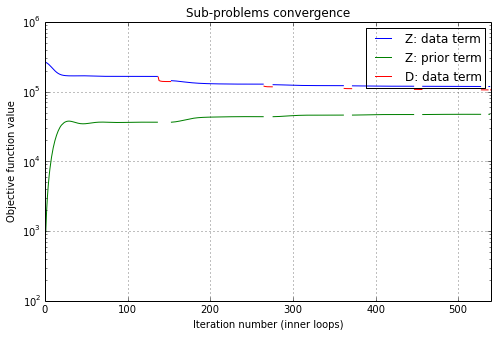

Inner loop: 541 iterations
g(Z) = ||X-DZ||_2^2 = 1.054880e+05
rdiff: 0.00104832700471
i(Z) = ||Z||_1 = 4.716551e+04
j(Z) = tr(Z^TLZ) = 1.260438e+04


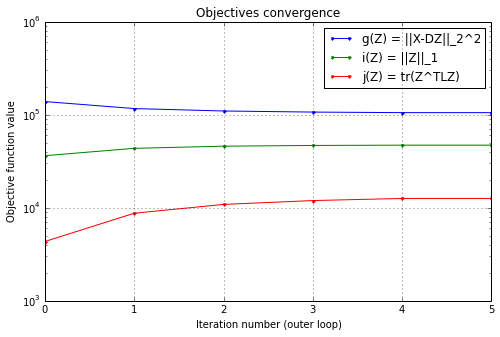

Global objective: 1.652579e+05


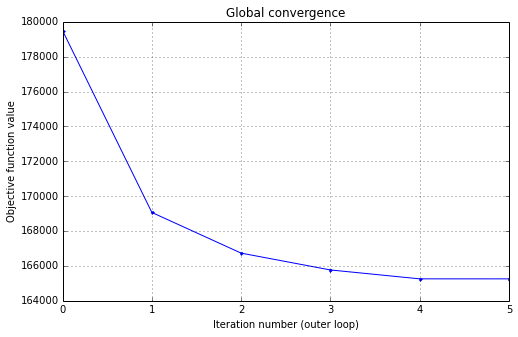

Outer loop: 6 iterations

Z in [-0.016452236101, 0.210115998983]
Sparsity of Z: 6,774,763 non-zero entries out of 19,072,000 entries, i.e. 35.5%.


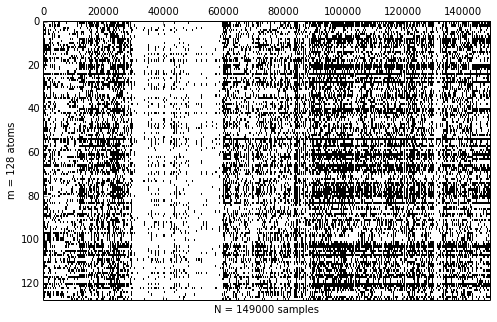

D in [-0.0220853313804, 0.829304158688]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


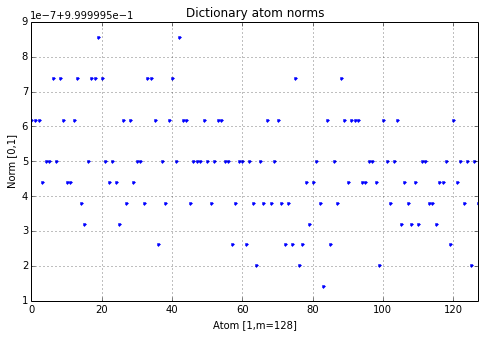

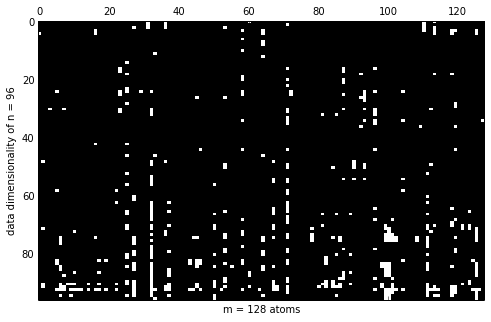

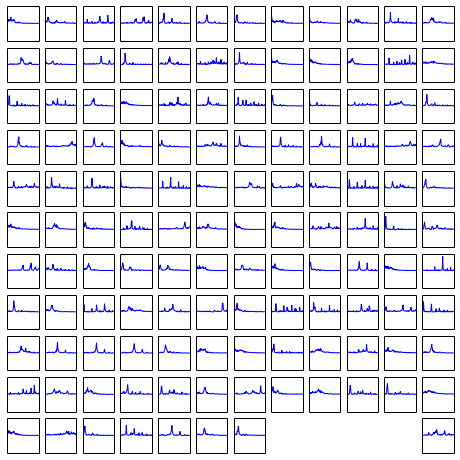

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 1376 seconds

 -------------------- Classification, noise_std = 0 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 

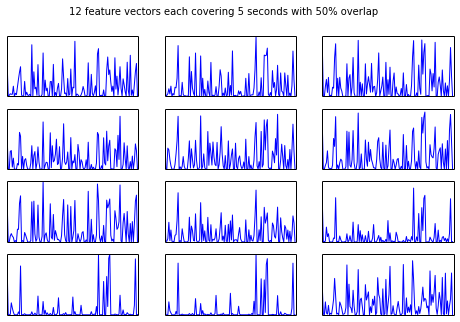

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 66.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 61.2 %
Clips accuracy: 65.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
  70 (+/- 2.2) <- [69 70 67 73 70 73 67 71 67 69]
  70 (+/- 2.0) <- [68 73 71 71 68 67 70 70 66 69]
  70 (+/- 1.8) <- [69 69 65 69 71 70 71 69 68 72]
  69 (+/- 1.3) <- [67 69 69 68 68 70 71 69 70 69]
  70 (+/- 2.0) <- [67 68 67 70 71 69 71 73 69 70]
  70 (+/- 2.3) <- [67 69 68 71 72 68 70 73 67 66]
  70 (+/- 1.4) <- [72 67 71 69 69 70 70 68 69 69]
  70 (+/- 1.8) <- [69 70 71 71 70 66 67 70 72 68]
  70 (+/- 1.7) <- [70 66 71 67 68 69 70 71 69 72]
  70 (+/

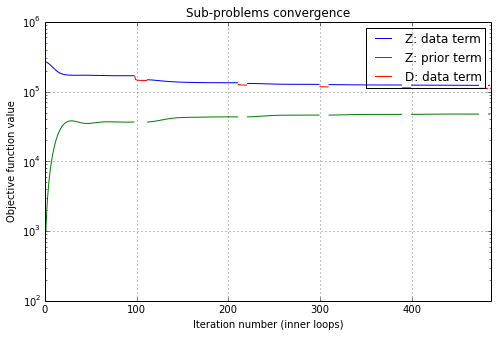

Inner loop: 488 iterations
g(Z) = ||X-DZ||_2^2 = 1.101739e+05
rdiff: 0.00762687834427
i(Z) = ||Z||_1 = 4.753918e+04
j(Z) = tr(Z^TLZ) = 1.237869e+04


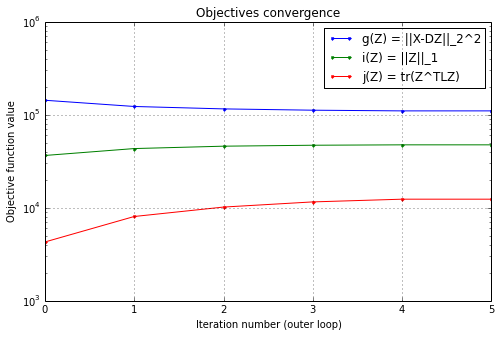

Global objective: 1.700918e+05


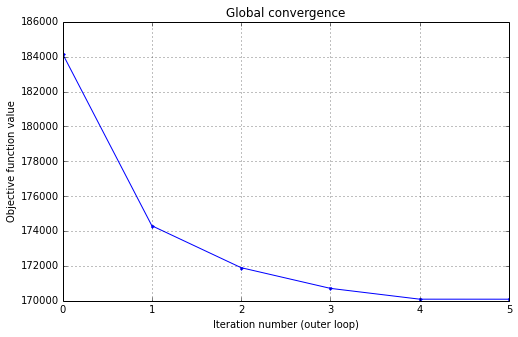

Outer loop: 6 iterations

Z in [-0.0139611400664, 0.242377787828]
Sparsity of Z: 6,919,962 non-zero entries out of 19,072,000 entries, i.e. 36.3%.


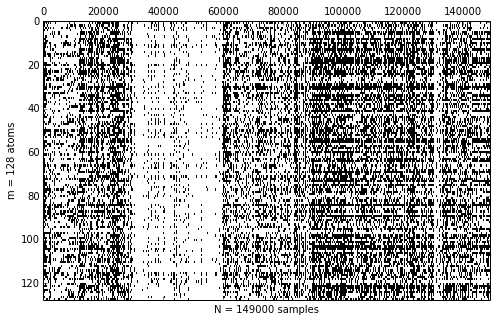

D in [-0.0191818922758, 0.812358021736]
d in [0.999999701977, 1.00000035763]
Constraints on D: True


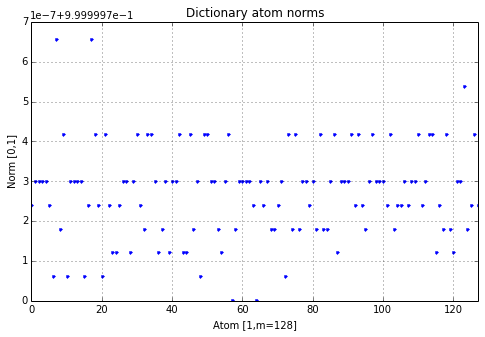

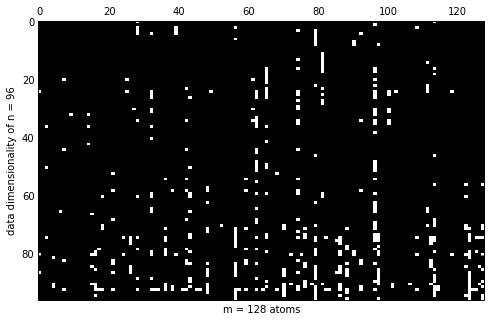

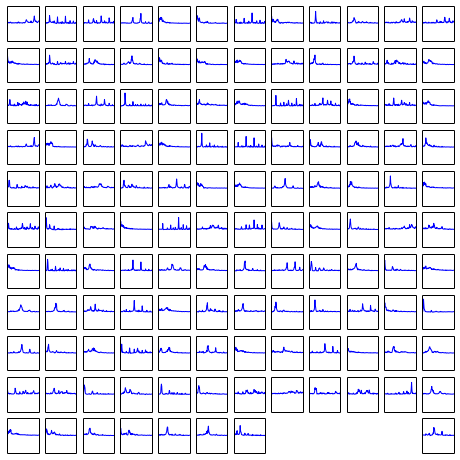

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 1279 seconds

 -------------------- Classification, noise_std = 0.01 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,0

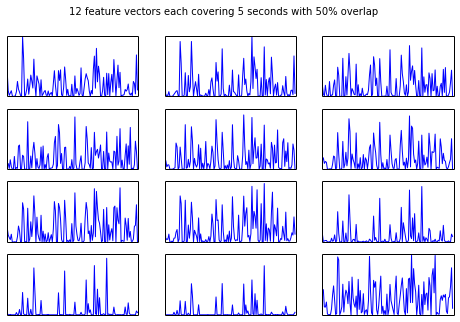

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 66.4 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 61.2 %
Clips accuracy: 65.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
  68 (+/- 1.6) <- [68 69 65 71 67 70 68 68 67 66]
  68 (+/- 2.5) <- [63 71 70 69 66 67 69 70 64 69]
  68 (+/- 1.7) <- [67 68 65 69 69 67 69 66 68 71]
  68 (+/- 1.7) <- [65 68 67 67 66 70 70 68 70 69]
  68 (+/- 2.2) <- [66 68 65 67 70 67 69 73 67 69]
  69 (+/- 2.2) <- [67 70 68 72 70 65 68 70 68 65]
  68 (+/- 1.5) <- [71 65 68 67 69 68 69 66 68 69]
  68 (+/- 1.8) <- [68 67 68 68 69 64 68 69 71 66]
  69 (+/- 1.1) <- [68 68 69 69 66 66 70 68 68 69]
  68 (+/

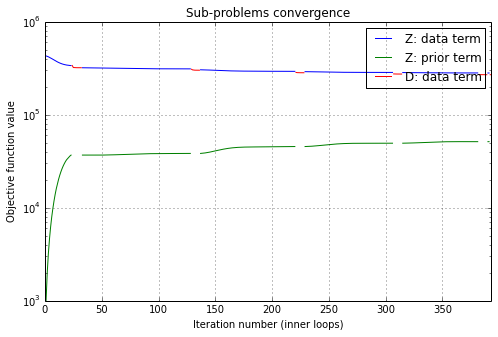

Inner loop: 394 iterations
g(Z) = ||X-DZ||_2^2 = 2.693086e+05
rdiff: 0.00199055770572
i(Z) = ||Z||_1 = 5.142709e+04
j(Z) = tr(Z^TLZ) = 1.215427e+04


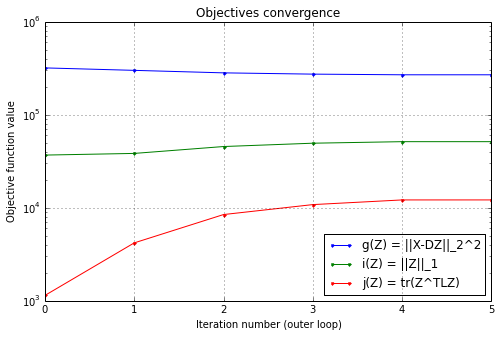

Global objective: 3.328899e+05


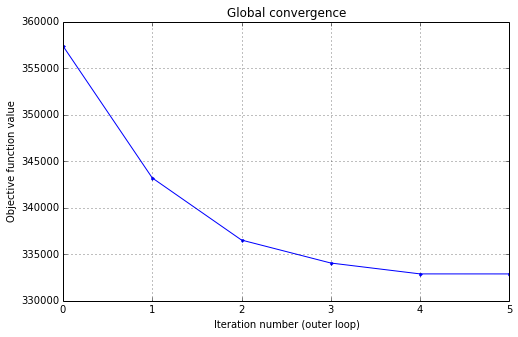

Outer loop: 6 iterations

Z in [-0.029840329662, 0.188420414925]
Sparsity of Z: 7,303,229 non-zero entries out of 19,072,000 entries, i.e. 38.3%.


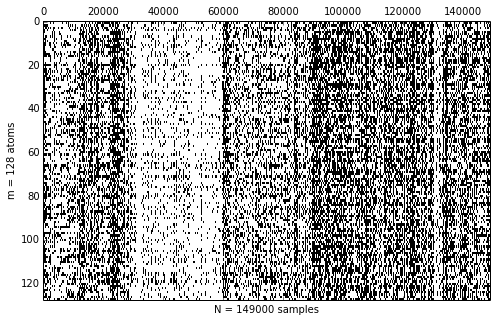

D in [-0.0334715209901, 0.762210965157]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


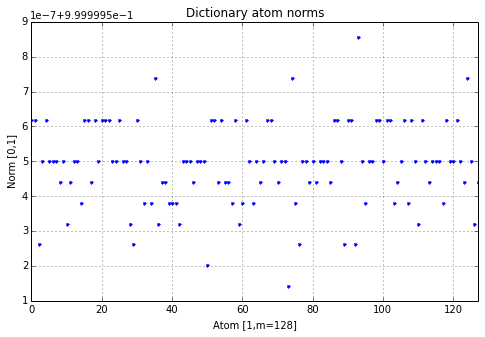

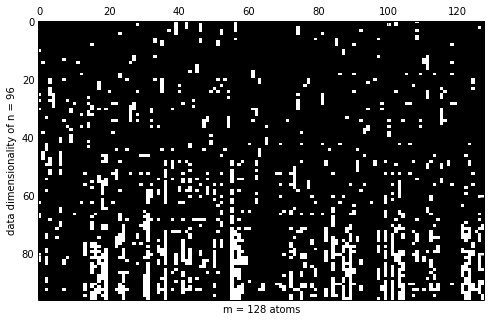

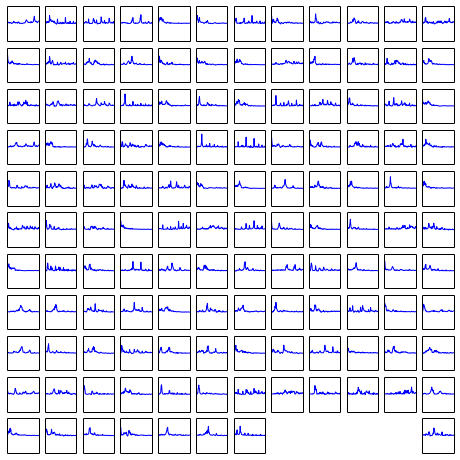

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 1053 seconds

 -------------------- Classification, noise_std = 0.05 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,0

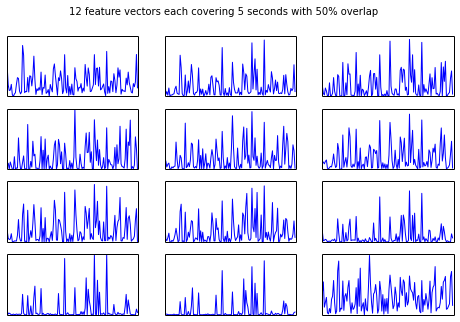

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 66.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 59.8 %
Clips accuracy: 66.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
  67 (+/- 1.8) <- [65 68 64 70 67 68 65 68 67 67]
  68 (+/- 2.5) <- [62 71 70 68 66 66 69 68 65 68]
  67 (+/- 1.6) <- [67 68 63 67 68 66 67 67 67 68]
  67 (+/- 1.2) <- [65 68 66 68 65 67 69 67 66 66]
  67 (+/- 1.8) <- [66 66 66 67 65 65 68 72 66 67]
  68 (+/- 1.7) <- [66 67 66 71 68 65 68 69 66 66]
  67 (+/- 1.9) <- [68 64 67 67 68 68 69 63 69 68]
  67 (+/- 1.4) <- [68 68 66 69 68 65 66 68 68 65]
  67 (+/- 1.9) <- [68 65 67 69 66 63 69 70 66 67]
  68 (+/

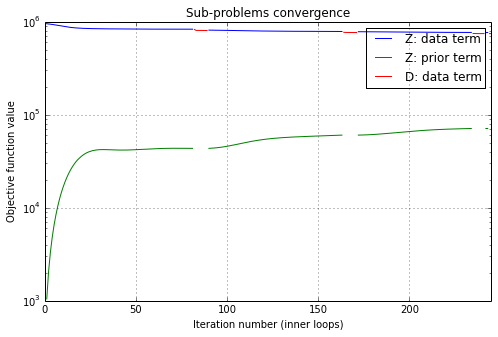

Inner loop: 246 iterations
g(Z) = ||X-DZ||_2^2 = 7.462377e+05
rdiff: 0.000593498029647
i(Z) = ||Z||_1 = 7.127560e+04
j(Z) = tr(Z^TLZ) = 2.056625e+04


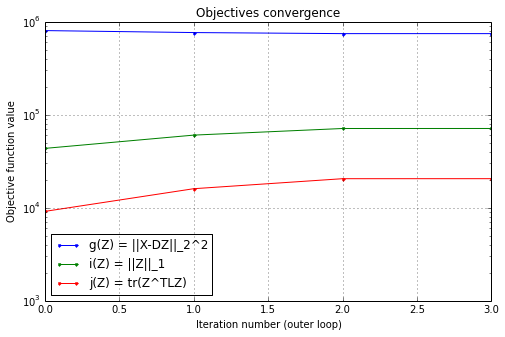

Global objective: 8.380796e+05


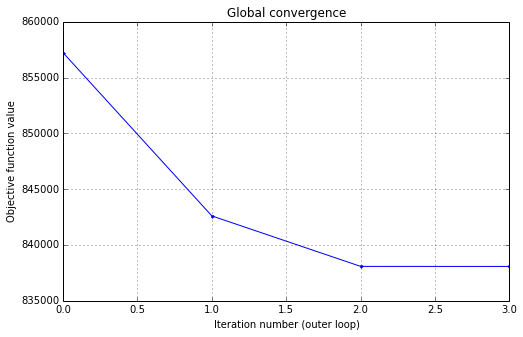

Outer loop: 4 iterations

Z in [-0.056636184454, 0.14264112711]
Sparsity of Z: 8,786,613 non-zero entries out of 19,072,000 entries, i.e. 46.1%.


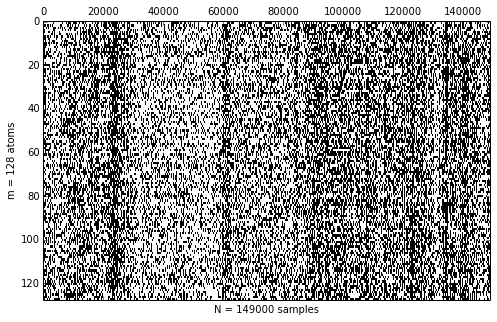

D in [-0.145910441875, 0.507630586624]
d in [0.999999761581, 1.00000023842]
Constraints on D: True


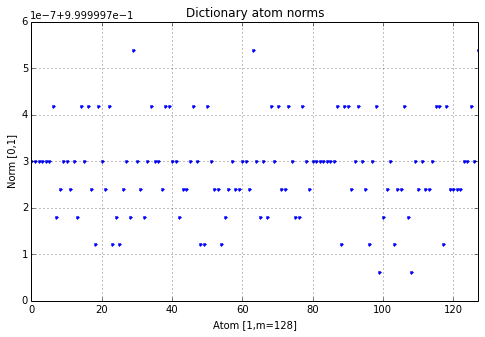

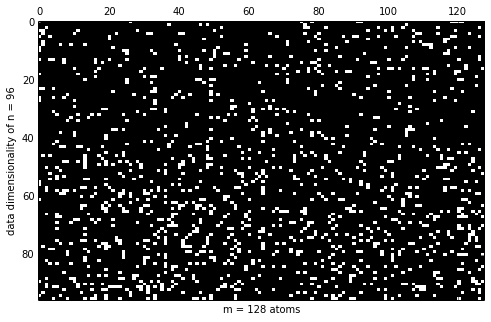

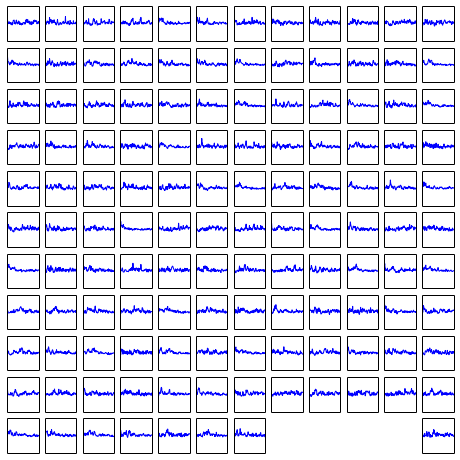

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 675 seconds

 -------------------- Classification, noise_std = 0.1 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000

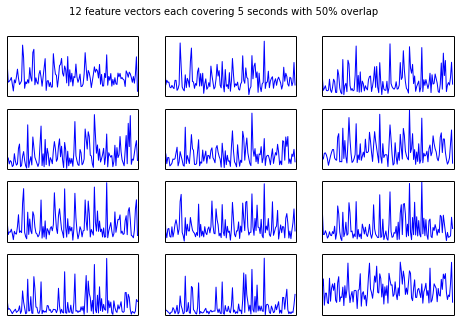

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 63.2 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 57.2 %
Clips accuracy: 62.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
  64 (+/- 1.9) <- [63 64 59 66 66 65 65 63 65 64]
  64 (+/- 2.7) <- [59 68 65 65 61 64 67 62 62 66]
  64 (+/- 1.5) <- [64 64 60 65 65 62 65 63 63 65]
  64 (+/- 1.8) <- [62 62 61 66 61 64 66 62 64 65]
  64 (+/- 2.3) <- [60 61 65 64 62 63 65 69 63 66]
  64 (+/- 2.6) <- [62 62 64 68 66 63 64 68 61 61]
  64 (+/- 1.5) <- [63 62 66 64 64 64 61 61 63 65]
  64 (+/- 1.3) <- [64 63 63 63 63 63 62 65 66 62]
  64 (+/- 1.7) <- [66 64 65 63 61 60 65 65 64 65]
  64 (+/

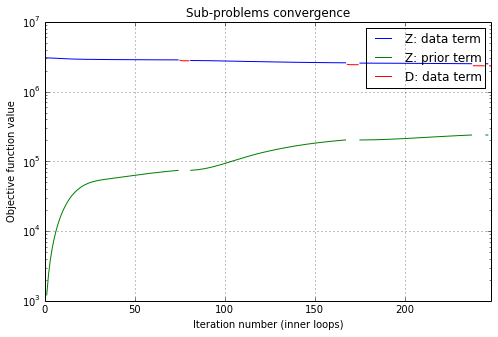

Inner loop: 249 iterations
g(Z) = ||X-DZ||_2^2 = 2.340865e+06
rdiff: 0.000204251433515
i(Z) = ||Z||_1 = 2.382854e+05
j(Z) = tr(Z^TLZ) = 1.624589e+05


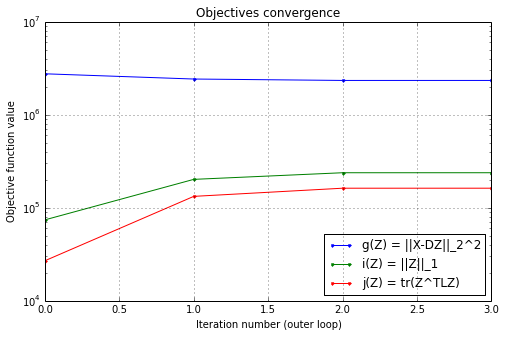

Global objective: 2.741609e+06


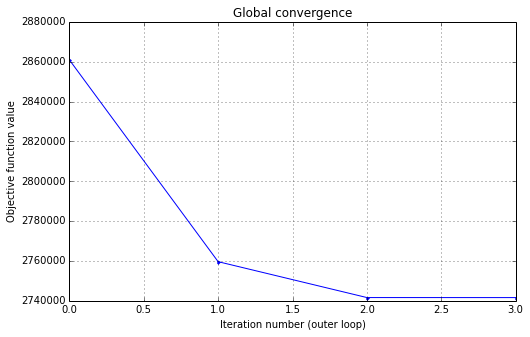

Outer loop: 4 iterations

Z in [-0.127260550857, 0.174423024058]
Sparsity of Z: 13,575,889 non-zero entries out of 19,072,000 entries, i.e. 71.2%.


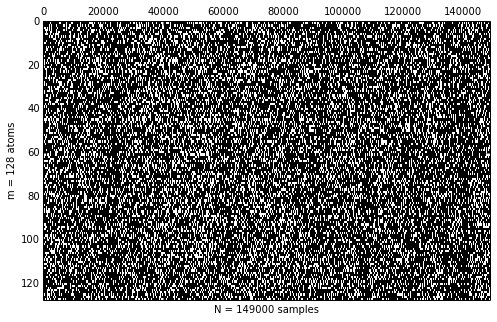

D in [-0.226251766086, 0.337059885263]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


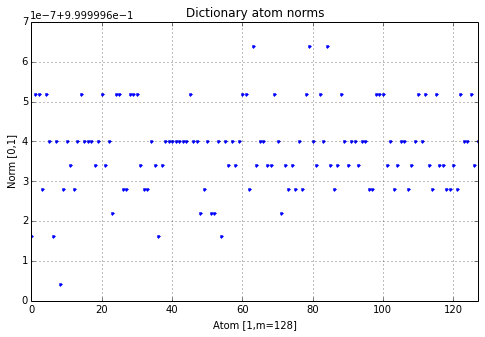

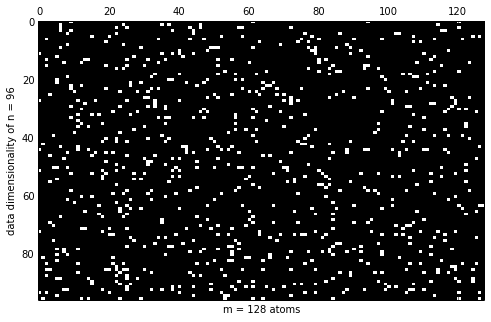

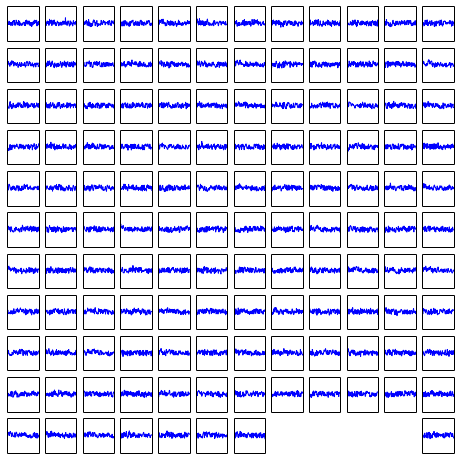

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 694 seconds

 -------------------- Classification, noise_std = 0.2 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000

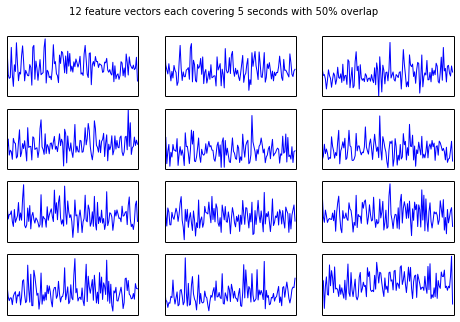

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 53.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 46.8 %
Clips accuracy: 55.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
  54 (+/- 2.3) <- [54 54 53 58 52 52 53 51 53 58]
  54 (+/- 1.6) <- [51 57 55 52 54 54 55 53 52 54]
  55 (+/- 1.5) <- [54 55 53 54 51 55 54 54 54 57]
  54 (+/- 1.7) <- [51 53 53 56 52 54 56 52 56 54]
  54 (+/- 2.2) <- [52 52 53 51 53 56 57 57 52 57]
  54 (+/- 1.8) <- [53 56 53 55 57 52 53 56 52 53]
  54 (+/- 1.6) <- [55 53 53 56 56 56 53 51 53 53]
  54 (+/- 2.0) <- [55 53 53 51 55 54 52 57 54 52]
  54 (+/- 2.4) <- [55 56 51 52 50 53 56 57 52 54]
  54 (+/

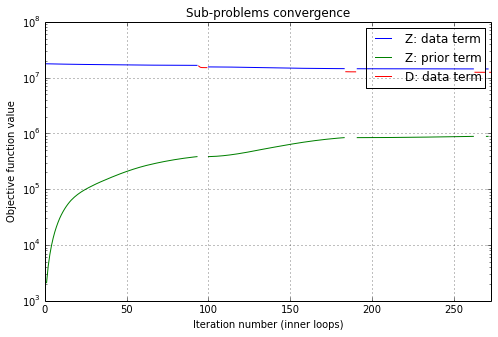

Inner loop: 274 iterations
g(Z) = ||X-DZ||_2^2 = 1.244424e+07
rdiff: 0.000162223614656
i(Z) = ||Z||_1 = 8.842099e+05
j(Z) = tr(Z^TLZ) = 1.848234e+06


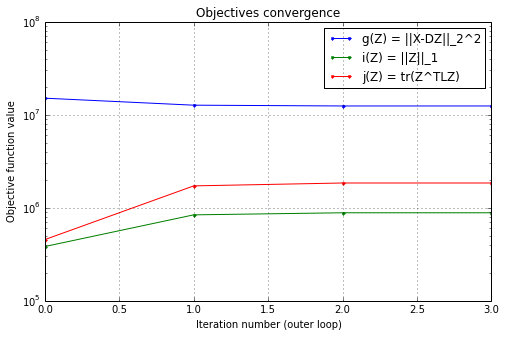

Global objective: 1.517669e+07


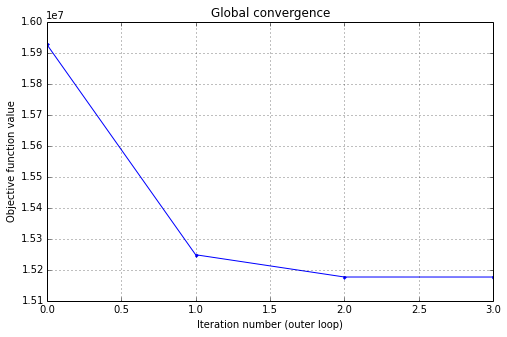

Outer loop: 4 iterations

Z in [-0.364202648401, 0.404131710529]
Sparsity of Z: 17,284,743 non-zero entries out of 19,072,000 entries, i.e. 90.6%.


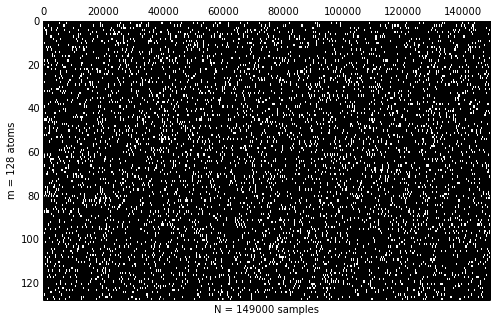

D in [-0.25324138999, 0.301008045673]
d in [0.999999701977, 1.00000023842]
Constraints on D: True


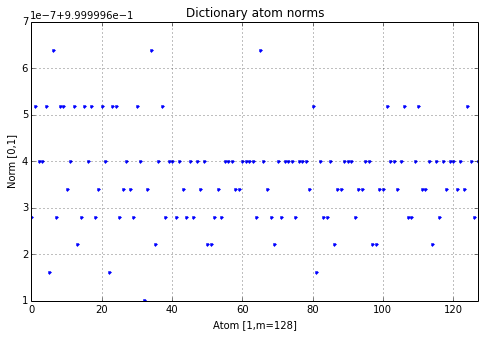

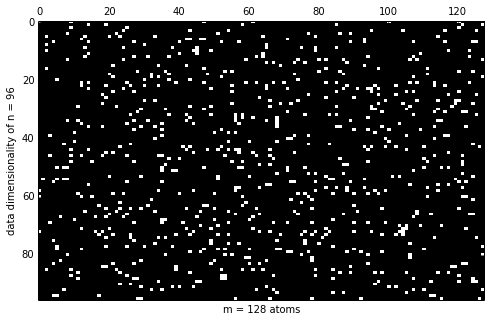

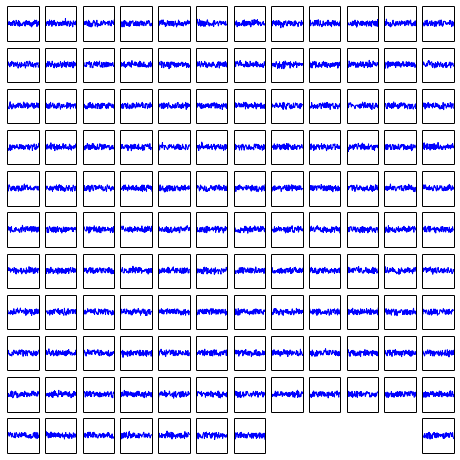

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 760 seconds

 -------------------- Classification, noise_std = 0.5 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000

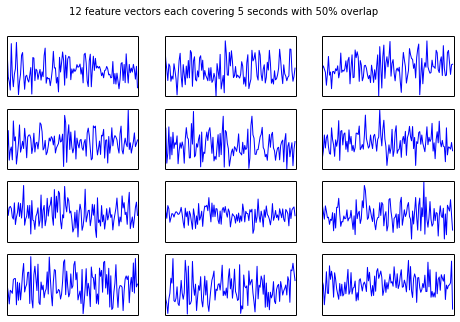

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 46.1 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 43.0 %
Clips accuracy: 55.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
  47 (+/- 1.5) <- [47 45 45 49 48 46 47 47 44 47]
  47 (+/- 2.2) <- [44 48 47 47 52 45 46 45 45 49]
  47 (+/- 2.5) <- [48 44 45 50 45 45 45 47 49 52]
  47 (+/- 2.3) <- [42 45 47 45 46 48 49 49 49 49]
  48 (+/- 2.0) <- [46 46 44 45 46 46 50 50 49 49]
  47 (+/- 2.1) <- [44 48 45 51 50 44 46 47 47 46]
  47 (+/- 1.7) <- [48 44 46 50 45 48 46 47 48 46]
  46 (+/- 2.5) <- [48 45 47 44 44 43 45 50 51 44]
  47 (+/- 2.2) <- [49 46 44 45 42 46 48 50 46 47]
  47 (+/

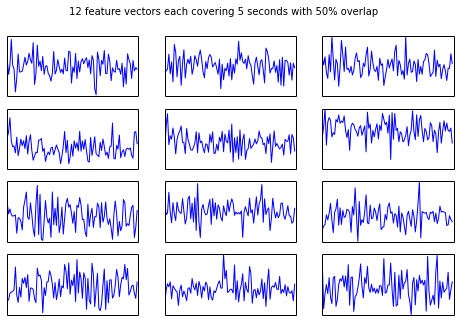

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 30.6 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 28.9 %
Clips accuracy: 39.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
  31 (+/- 1.6) <- [30 34 30 30 32 33 33 28 30 30]
  31 (+/- 1.5) <- [32 31 31 32 32 30 32 30 30 28]
  31 (+/- 1.8) <- [33 30 30 27 31 31 32 34 30 30]
  31 (+/- 1.6) <- [31 28 30 33 32 34 31 30 30 29]
  31 (+/- 1.6) <- [30 31 31 30 29 29 32 28 33 33]
  31 (+/- 1.7) <- [33 29 28 31 29 31 33 33 31 30]
  31 (+/- 2.3) <- [30 33 34 30 30 30 31 31 27 26]
  31 (+/- 1.7) <- [32 31 31 30 31 30 32 32 26 31]
  31 (+/- 1.4) <- [31 31 29 30 34 31 31 30 30 29]
  31 (+/- 1

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if not regen_graph and not regen_features:
    # Classifier parameters are being tested.
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
else:
    separator('Baseline')
    %run audio_classification.ipynb
res['baseline'] = len(Pvalues) * [accuracy]
res['baseline_std'] = accuracy_std

## Results

noise_std = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
res['accuracy_std'] = [1.9569079919323971, 1.916991095730785, 1.8569322072230388, 2.0573335966191237, 1.9727714219679207, 1.8776840048906589]
res['objective_j'] = [12604.379272460938, 12378.6865234375, 12154.268646240234, 20566.252136230469, 162458.87451171875, 1848233.984375]
res['objective_i'] = [47165.51171875, 47539.18359375, 51427.0859375, 71275.6015625, 238285.359375, 884209.9375]
res['objective_h'] = [0, 0, 0, 0, 0, 0]
res['objective_g'] = [105488.017578125, 110173.935546875, 269308.5546875, 746237.734375, 2340864.84375, 12444242.5]
res['baseline'] = [31.160833333333326, 31.160833333333326, 31.160833333333326, 31.160833333333326, 31.160833333333326, 31.160833333333326]
res['time_features'] = [1368.6820850372314, 1269.6909170150757, 1042.9591279029846, 662.9381308555603, 681.5209469795227, 746.6923279762268]
res['baseline_std'] = 1.66919620543
res['sparsity'] = [35.52203754194631, 36.28335780201342, 38.292937290268455, 46.07074769295302,

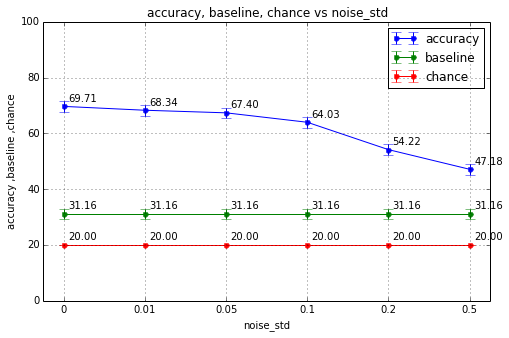

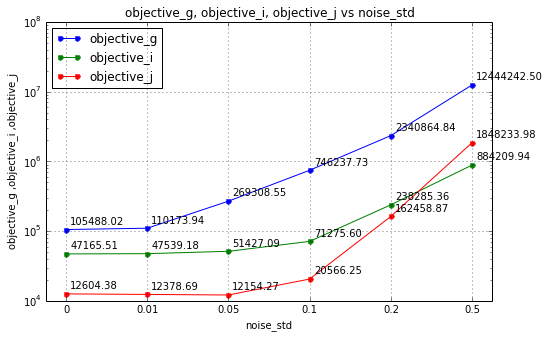

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


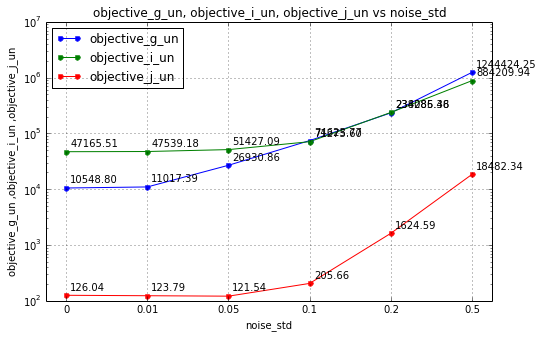

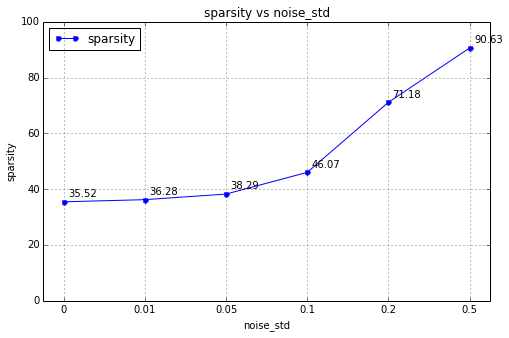

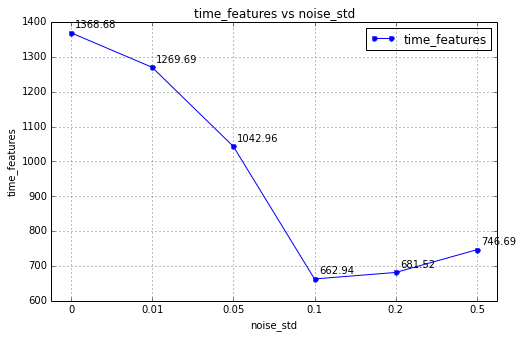

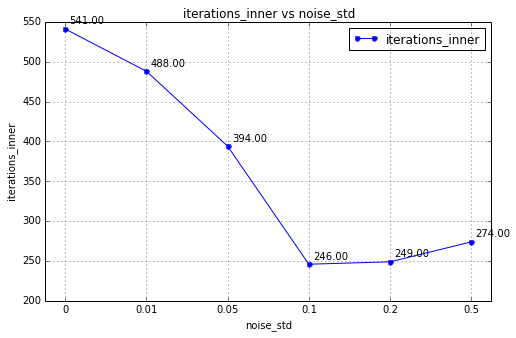

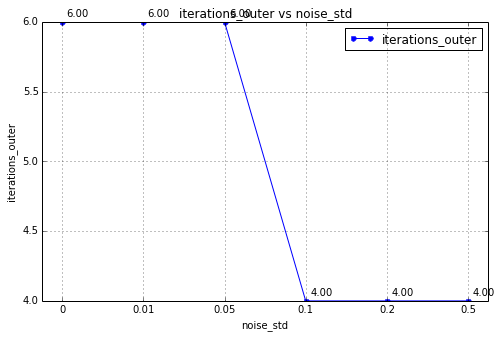

Dictionary atoms for noise_std = 0
Dictionary atoms for noise_std = 0.01
Dictionary atoms for noise_std = 0.05
Dictionary atoms for noise_std = 0.1
Dictionary atoms for noise_std = 0.2
Dictionary atoms for noise_std = 0.5
Experiment time: 10427 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))